![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

# Research to Production
## Uncorrelated Assets
---------
### Introduction
This page explains how to you can use the Research Environment to develop and test a Uncorrelated Assets hypothesis, then put the hypothesis in production.

<a href="https://www.quantconnect.com/docs/v2/research-environment/tutorials/research-to-production/uncorrelated-assets">Documentation</a>

### Create Hypothesis
According to Modern Portfolio Thoery, asset combinations with negative or very low correlation could have lower total portfolio variance given the same level of return. Thus, uncorrelated assets allows you to find a portfolio that will, theoretically, be more diversified and resilient to extreme market events. We're testing this statement in real life scenario, while hypothesizing a portfolio with uncorrelated assets could be a consistent portfolio. In this example, we'll compare the performance of 5-least-correlated-asset portfolio (proposed) and 5-most-correlated-asset portfolio (benchmark), both equal weighting.

### Import Libraries
We'll need to import packages to help with data processing and visualization. Import numpy and matplotlib packages by the following:

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Get Historical Data
To begin, we retrieve historical data for research.

In [2]:
# Instantiate a QuantBook.
qb = QuantBook()

# Select the desired tickers for research.
assets = ["SHY", "TLT", "SHV", "TLH", "EDV", "BIL",
          "SPTL", "TBT", "TMF", "TMV", "TBF", "VGSH", "VGIT",
          "VGLT", "SCHO", "SCHR", "SPTS", "GOVT"]

# Call the AddEquity method with the tickers, and its corresponding resolution. Then store their Symbols. Resolution.Minute is used by default. 
for i in range(len(assets)):
    qb.AddEquity(assets[i],Resolution.Minute)

# Call the History method with qb.Securities.Keys for all tickers, time argument(s), and resolution to request historical data for the symbol.
history = qb.History(qb.Securities.Keys, datetime(2020, 1, 1), datetime(2022, 1, 1), Resolution.Daily)
history

close       high        low       open  \
symbol           time                                                     
TBF UF9WRZG9YA1X 2020-01-03  19.356575  19.506239  19.286732  19.506239   
                 2020-01-04  19.077202  19.239338  19.057247  19.196933   
                 2020-01-07  19.176978  19.201922  18.987403  18.987403   
                 2020-01-08  19.266776  19.266776  19.167000  19.196933   
                 2020-01-09  19.386508  19.456351  19.186956  19.226866   
...                                ...        ...        ...        ...   
BIL TT1EBZ21QWKL 2021-12-28  91.430000  91.430000  91.420000  91.420000   
                 2021-12-29  91.420000  91.430000  91.420000  91.430000   
                 2021-12-30  91.420000  91.430000  91.420000  91.420000   
                 2021-12-31  91.430000  91.430000  91.390000  91.420000   
                 2022-01-01  91.430000  91.430000  91.420000  91.420000   

                                volume  
symbol           time                   
TBF UF9WRZG9YA1X 2020-01-03   493072.0  
                 2020-01-04   295264.0  
                 2020-01-07   425180.0  
                 2020-01-08   798296.0  
                 2020-01-09  1256639.0  
...                                ...  
BIL TT1EBZ21QWKL 2021-12-28   729055.0  
                 2021-12-29  1932904.0  
                 2021-12-30  1244000.0  
                 2021-12-31   833112.0  
                 2022-01-01   868470.0  

[9090 rows x 5 columns]

### Preparing Data
We'll have to process our data to get their correlation and select the least and most related ones.

In [3]:
# Select the close column and then call the unstack method, then call pct_change to compute the daily return.
returns = history['close'].unstack(level=0).pct_change().iloc[1:]

# Write a function to obtain the least and highest correlated 5 assets.
def GetUncorrelatedAssets(returns, num_assets):
    # Get correlation
    correlation = returns.corr()
    
    # Find assets with lowest and highest absolute sum correlation
    selected = []
    for index, row in correlation.iteritems():
        corr_rank = row.abs().sum()
        selected.append((index, corr_rank))

    # Sort and take the top num_assets
    sort_ = sorted(selected, key = lambda x: x[1])
    uncorrelated = sort_[:num_assets]
    correlated = sort_[-num_assets:]
    
    return uncorrelated, correlated

selected, benchmark = GetUncorrelatedAssets(returns, 5)
selected, benchmark

([('BIL TT1EBZ21QWKL', 1.8823920836918153),
  ('SHV TP8J6Z7L419H', 4.579383138608124),
  ('SHY SGNKIKYGE9NP', 10.987440096597734),
  ('SST V2245V5VOQQT', 11.016366382032086),
  ('SCHO UOVIOSUIT3DX', 11.079412024006714)],
 [('GOVT V45XL2BVKU3P', 13.856878984475161),
  ('TMV UBTUG7D0B7TX', 13.862565803110137),
  ('VGIT UHVG8V7B7YAT', 13.866023147522155),
  ('VGLT UHVG8V7B7YAT', 13.943935201419684),
  ('TLO TT1EBZ21QWKL', 13.95242214627819)])

### Test the Hypothesis
To test the hypothesis: Our desired outcome would be a consistent and low fluctuation equity curve should be seen, as compared with benchmark.

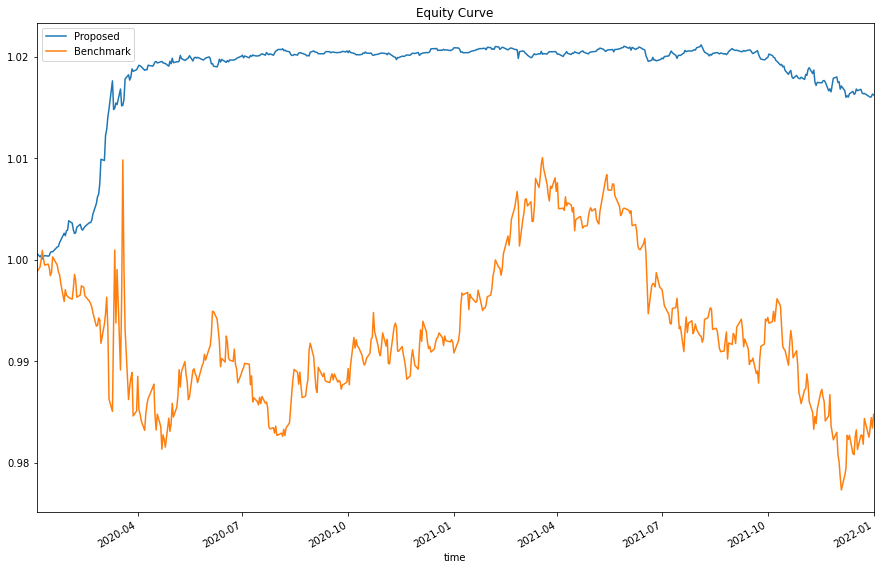

In [4]:
# Construct a equal weighting portfolio for the 5-uncorrelated-asset-portfolio and the 5-correlated-asset-portfolio (benchmark).
port_ret = returns[[x[0] for x in selected]] / 5
bench_ret = returns[[x[0] for x in benchmark]] / 5

# Call cumprod to get the cumulative return.
total_ret = (np.sum(port_ret, axis=1) + 1).cumprod()
total_ret_bench = (np.sum(bench_ret, axis=1) + 1).cumprod()

# Plot the result.
plt.figure(figsize=(15, 10))
total_ret.plot(label='Proposed')
total_ret_bench.plot(label='Benchmark')
plt.title('Equity Curve')
plt.legend()
plt.show()

We can clearly see from the results, the proposed uncorrelated-asset-portfolio has a lower variance/fluctuation, thus more consistent than the benchmark. This proven our hypothesis.